In [1]:
import numpy as np 
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt 
import pickle as pk 
import pandas as pd 

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
# plt.style.use('tableau-colorblind10')

In [2]:
!pwd

/Users/ferlejarza/Desktop/Baldea/observability_estimation_perishbables/code/github


## Loading results files 

In [3]:
# path to root_directory
path = '/Users/ferlejarza/Desktop/Baldea/observability_estimation_perishbables/code/MPC_MHE_0916/'


with open(path+'results2_0919/costs_estimation_fb.pickle', 'rb') as handle:
    costs_estimation_fb = pk.load(handle)
    
with open(path+'results2_0919/costs_no_fb_inv.pickle', 'rb') as handle:
    costs_no_fb_inv = pk.load(handle)
    
# with open('costs_no_fb_inv.pickle', 'rb') as handle:
#     costs_no_fb_inv = pk.load(handle)
    
# with open('costs_no_fb.pickle', 'rb') as handle:
#     costs_no_fb = pk.load(handle)
    
with open(path+'results2_0919/costs_perfect_fb.pickle', 'rb') as handle:
    costs_perfect_fb = pk.load(handle)
    
    
with open(path+'/data_estimation2_0919/estimation_fb_x_past_true.pickle', 'rb') as handle:
    estimation_fb_x_past_true_instance = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_x_past.pickle', 'rb') as handle:
    estimation_fb_x_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_u_past.pickle', 'rb') as handle:
    estimation_fb_u_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_u_past_true.pickle', 'rb') as handle:
    estimation_fb_u_past_true_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_demand_dict.pickle', 'rb') as handle:
    estimation_fb_demand_instance = pk.load(handle) 
    
with open(path+'/data_estimation2_0919/estimation_fb_x_past_true.pickle', 'rb') as handle:
    no_fb_inv_x_past_true_instance = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_x_past.pickle', 'rb') as handle:
    no_fb_inv_x_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_u_past.pickle', 'rb') as handle:
    no_fb_inv_u_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_u_past_true.pickle', 'rb') as handle:
    no_fb_inv_u_past_true_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_demand_dict.pickle', 'rb') as handle:
    no_fb_inv_demand_instance = pk.load(handle) 
    
with open(path+'/data_estimation2_0919/perfect_fb_x_past_true.pickle', 'rb') as handle:
    perfect_fb_x_past_true_instance = pk.load(handle)
    
with open(path+'/data_estimation2_0919/perfect_fb_x_past.pickle', 'rb') as handle:
    perfect_fb_x_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/perfect_fb_u_past.pickle', 'rb') as handle:
    perfect_fb_u_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/perfect_fb_u_past_true.pickle', 'rb') as handle:
    perfect_fb_u_past_true_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/perfect_fb_demand_dict.pickle', 'rb') as handle:
    perfect_fb_demand_instance = pk.load(handle)


## Plotting cost comparison over time 

In [4]:
def plotting_fun(cost_dict, norm = None,  ax = None, color = None, linestyle = None): 
    
    if ax is None:
        ax = plt.gca()
        
    if norm is not None: 
        cost_dict = {i:[cost_dict[i][t]/norm for t,_ in enumerate(cost_dict[i])] for i in cost_dict.keys()}
        
    avg_cost = []
    std_cost = []
    for t in range(15,len(cost_dict[0])):
        cost_t = [] 
        for i in cost_dict.keys(): 
            cost_t.append(cost_dict[i][t])
        avg_cost.append(np.mean(cost_t)) 
        std_cost.append(np.std(cost_t))
    
    
    print(np.mean(avg_cost[10:])) 
    # plt.figure(figsize=(3, 2)) 
    ax.plot([t for t in range(15,len(cost_dict[0]))], avg_cost, linewidth = 2, color = color, linestyle = linestyle) 
    ax.fill_between([t for t in range(15,len(cost_dict[0]))], 
                 [j-1.96*std_cost[i]/np.sqrt(10) for i,j in enumerate(avg_cost)], 
                 [j+1.96*std_cost[i]/np.sqrt(10) for i,j in enumerate(avg_cost)], 
                 alpha = 0.2, color = color)# step = "pre")  

    return ax 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


0.4558124150526342
2.1025593723829057
1.2116081212577257


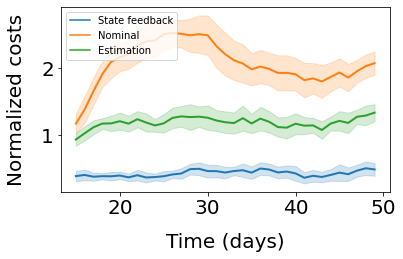

In [5]:
norm =  max([max(costs_perfect_fb[i]['all']) for i in costs_perfect_fb.keys()]) 

ax = plotting_fun({i:costs_perfect_fb[i]['all'] for i in costs_perfect_fb.keys()} , norm = norm, color = 'C0')
# ax = plotting_fun(costs_no_fb, norm = norm)
ax = plotting_fun({i:costs_no_fb_inv[i]['all'] for i in costs_no_fb_inv.keys()}, ax=ax, norm = norm, color = 'C1') 
ax = plotting_fun({i:costs_estimation_fb[i]['all'] for i in costs_estimation_fb.keys()}, ax=ax, norm = norm, color = 'C2') 


plt.xlabel('Time (days)', labelpad = 15) 
plt.ylabel('Normalized costs', labelpad = 15) 

custom_lines = [Line2D([0], [0], color='C0'),
                Line2D([0], [0], color='C1'),
                Line2D([0], [0], color='C2'),]
                # Line2D([0], [0], color='C3'),]
plt.legend(custom_lines,['State feedback', 
                         'Nominal', 
                        # 'Limit case III',
                        'Estimation'], loc = 'upper left', ncol = 1, fontsize = 10) 
plt.tight_layout()
plt.savefig(path+'figures/costs_comparison') 

0.13072290955329696
0.6029951567569944
0.3474783345489272


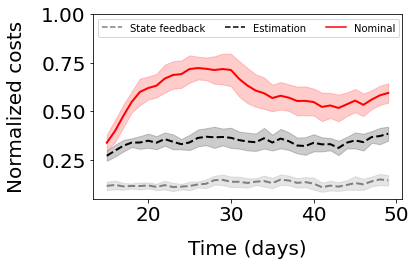

In [33]:
norm = max([max(costs_no_fb_inv[i]['all']) for i in costs_perfect_fb.keys()]) 

ax = plotting_fun({i:costs_perfect_fb[i]['all'] for i in costs_perfect_fb.keys()}, norm = norm, color = 'grey', linestyle = '--')
# ax = plotting_fun(costs_no_fb, norm = norm)
ax = plotting_fun({i:costs_no_fb_inv[i]['all'] for i in costs_no_fb_inv.keys()}, ax=ax, norm = norm, color = 'red') 
ax = plotting_fun({i:costs_estimation_fb[i]['all'] for i in costs_estimation_fb.keys()}, ax=ax, norm = norm, color = 'k', linestyle = '--') 


plt.xlabel('Time (days)', labelpad = 15) 
plt.ylabel('Normalized costs', labelpad = 15) 

custom_lines = [Line2D([0], [0], color='grey',linestyle = '--'),
                Line2D([0], [0], color='k',linestyle = '--'),
                Line2D([0], [0], color='r'),]
                # Line2D([0], [0], color='C3'),]
plt.legend(custom_lines,['State feedback', 
                         'Estimation', 
                        # 'Limit case III',
                        'Nominal'], loc = 'upper left', ncol = 3, fontsize = 10) 
plt.tight_layout()
plt.ylim([ax.get_ylim()[0],1.000000333]) 
plt.savefig(path+'figures/costs_comparison_2') 



## Plotting aggregate costs comparison decomposed 

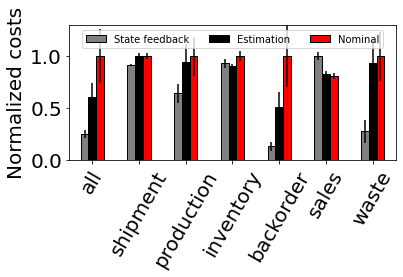

In [39]:
instances = 10 
variables = ['all', 'shipment', 'production', 'inventory', 'backorder', 'sales_profit', 'waste']
 

estmiation_fb_case_avg = []
perfect_fb_case_avg = []
no_fb_case_avg = []

estmiation_fb_case_std = []
perfect_fb_case_std = []
no_fb_case_std = []

index = [] 


for var in variables: 
    values_estmiation_fb= [] 
    values_perfect_fb = []
    values_no_fb = []
    
    for i in range(instances): 
       
        values_estmiation_fb.append(sum(costs_estimation_fb[i][var]))
        values_perfect_fb.append(sum(costs_perfect_fb[i][var]))
        values_no_fb.append(sum(costs_no_fb_inv[i][var]))
       

    max_cost = max(np.mean(values_estmiation_fb), np.mean(values_perfect_fb), np.mean(values_no_fb)) 
    
    estmiation_fb_case_avg.append(np.mean(values_estmiation_fb)/max_cost) 
    perfect_fb_case_avg.append(np.mean(values_perfect_fb)/max_cost) 
    no_fb_case_avg.append(np.mean(values_no_fb)/max_cost)
    
    estmiation_fb_case_std.append(np.std(values_estmiation_fb)/max_cost) 
    perfect_fb_case_std.append(np.std(values_perfect_fb)/max_cost) 
    no_fb_case_std.append(np.std(values_no_fb)/max_cost)

    index.append(var) 

index[-2] = 'sales' 
df = pd.DataFrame({'State feedback': perfect_fb_case_avg,
                   'Estimation': estmiation_fb_case_avg, 
                   'Nominal': no_fb_case_avg}, index=index)

yerr = 1.96*np.array([perfect_fb_case_std, estmiation_fb_case_std, no_fb_case_std])
ax = df.plot.bar(rot=0, 
                 yerr = yerr, 
                 color = ['grey', 'k', 'r'], edgecolor = 'k' )
ax.set_ylim([0,1.3]) 

plt.setp( ax.xaxis.get_majorticklabels(), rotation=60 )
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10) 
plt.ylabel('Normalized costs') 
plt.tight_layout() 
plt.savefig(path+'figures/costs_comparison_2_breakdown') 


## Plotting quality distribution

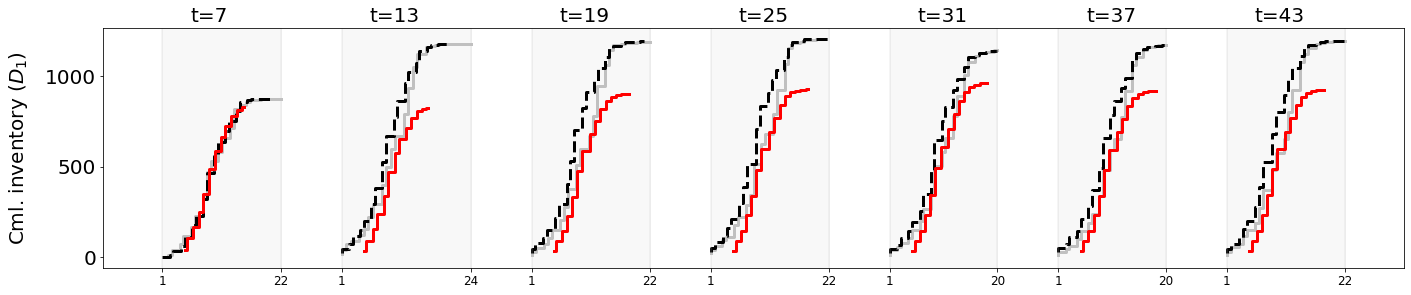

In [23]:
results = {'inventory': {}} 
cases_all = [] 
estimation = [] 
true = [] 
nominal = [] 
diff_nominal_estimate = [] 

t_estimate = [] 
t_nominal = [] 
t_true = [] 

qual_estimate_in = []
qual_nominal_in = []
qual_true_in = []

inv_estimate = [] 
inv_nominal = [] 
inv_true = [] 


for t in range(5,50): 
    
    x, y, z = [], [], []
    cases_all = [] 
    
    qual_estimate = {} 
    qual_nominal = {}
    qual_true = {}

    for q in range(1,31): 
        
         for instance_num in range(10):
        
#             real_time_estimates_Pinv = estimation_instances_nominal_Pinv[instance_num]
#             x_past_true = x_past_true_instance[instance_num]
#             x_past = x_past_instance[instance_num]
            
            x_past_true_est = estimation_fb_x_past_true_instance[instance_num]
            x_past_est = estimation_fb_x_past_instance[instance_num]
    
            x_past_true_nom = no_fb_inv_x_past_true_instance[instance_num]
            x_past_nom = no_fb_inv_x_past_instance[instance_num]

            cases_all.append([x_past_true_est['inventory'][('D1', q, 1,t)],
                              x_past_est['inventory'][('D1', q, 1,t)],
                              x_past_nom['inventory'][('D1', q, 1,t)]])

            if cases_all[-1][0] > 0: 
                if q not in qual_true.keys(): 
                    qual_true[q] = cases_all[-1][0]
                else: 
                    qual_true[q] += cases_all[-1][0]

            if cases_all[-1][1] > 0:
                if q not in qual_estimate.keys(): 
                    qual_estimate[q] = cases_all[-1][1]
                else: 
                    qual_estimate[q] += cases_all[-1][1]


            if cases_all[-1][2] > 0: 
                if q not in qual_nominal.keys(): 
                    qual_nominal[q] = cases_all[-1][2]
                else: 
                    qual_nominal[q] += cases_all[-1][2]
                    
 
    qual_estimate_in += [q for q in qual_estimate.keys()] 
    qual_nominal_in += [q for q in qual_nominal.keys()] 
    qual_true_in += [q for q in qual_true.keys()] 
    
    inv_estimate += [0.5*i for _,i in qual_estimate.items()] 
    inv_nominal += [0.5*i for _,i in qual_nominal.items()] 
    inv_true += [0.5*i for _,i in qual_true.items()] 
     
    t_estimate += [t-0.3 for _ in qual_estimate.keys()] 
    t_nominal += [t for _ in qual_nominal.keys()] 
    t_true += [t+0.3 for _ in qual_true.keys()] 
    
separation = 0
x_ticks_labels = [] 
x_ticks_values = [] 

fig = plt.figure(figsize = (20,4.5)) 
axes = plt.gca() 
for t in range(7,47,6): 
    q_vec_est = [] 
    q_vec_true = [] 
    q_vec_nominal = [] 

    for i,j in enumerate(t_estimate):
        if j == t-0.3: 
            q_vec_est += [qual_estimate_in[i] for _ in range(int(inv_estimate[i]))]
    for i,j in enumerate(t_true):
        if j == t+0.3 : 
            q_vec_true += [qual_true_in[i] for _ in range(int(inv_true[i]))]
    for i,j in enumerate(t_nominal):
        if j == t: 
            q_vec_nominal += [qual_nominal_in[i] for _ in range(int(inv_nominal[i]))]

    min_base = 100 
    max_base = 0 
    
    values, base = np.histogram(q_vec_true, bins=30)
    cumulative = np.cumsum(values)
    plt.step([i+separation for i in base[:-1]], cumulative, color = 'silver', linestyle = '-', alpha= 1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1]) 
    
    values, base = np.histogram(q_vec_est, bins=30)
    cumulative = np.cumsum(values)
    plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '--', alpha=1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])

    values, base = np.histogram(q_vec_nominal, bins=30)
    cumulative = np.cumsum(values)
    plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '-', linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])
    
    plt.text(x = min_base+separation+5, y = 1300,  s='t='+str(t))
    
    plt.axvline(x = min_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvline(x = max_base+separation , color = 'silver', alpha = 0.2) 
    x_ticks_labels += [int(np.round(min_base,0)), int(np.round(max_base,0)) ]
    x_ticks_values += [min_base+separation, max_base+separation] 
    
    
    plt.axvspan(xmin = min_base+separation, xmax=max_base+separation, color = 'silver', alpha = 0.1) 
    
    separation += max_base + 10
    
    
plt.ylabel(r'Cml. inventory ($D_1$)', labelpad=15)
# plt.xlabel('Product quality', labelpad=15)
# plt.legend(['State feedback', 
#              'Estimation', 'Nominal'], loc = 'center', ncol = 3, fontsize = 12) 
plt.xticks(x_ticks_values,x_ticks_labels, fontsize = 12) 
# plt.xlim((*axes.get_xlim()[0], 0.95*axes.get_xlim()[1]))  
plt.tight_layout() 
plt.savefig(path+'figures/quality_distribution') 



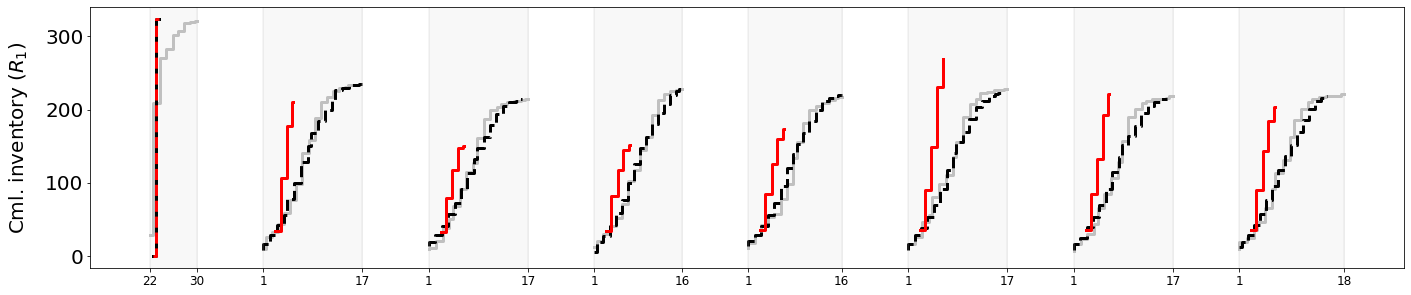

In [24]:
results = {'inventory': {}} 
cases_all = [] 
estimation = [] 
true = [] 
nominal = [] 
diff_nominal_estimate = [] 

t_estimate = [] 
t_nominal = [] 
t_true = [] 

qual_estimate_in = []
qual_nominal_in = []
qual_true_in = []

inv_estimate = [] 
inv_nominal = [] 
inv_true = [] 


for t in range(5,50): 
    
    x, y, z = [], [], []
    cases_all = [] 
    
    qual_estimate = {} 
    qual_nominal = {}
    qual_true = {}

    for q in range(1,31): 
        
         for instance_num in range(10):
        
#             real_time_estimates_Pinv = estimation_instances_nominal_Pinv[instance_num]
#             x_past_true = x_past_true_instance[instance_num]
#             x_past = x_past_instance[instance_num]
            
            x_past_true_est = estimation_fb_x_past_true_instance[instance_num]
            x_past_est = estimation_fb_x_past_instance[instance_num]
    
            x_past_true_nom = no_fb_inv_x_past_true_instance[instance_num]
            x_past_nom = no_fb_inv_x_past_instance[instance_num]
            
            for i in range(1,2): 

                cases_all.append([x_past_true_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_nom['inventory'][('R'+str(i), q, 1,t)]])

                if cases_all[-1][0] > 0: 
                    if q not in qual_true.keys(): 
                        qual_true[q] = cases_all[-1][0]
                    else: 
                        qual_true[q] += cases_all[-1][0]

                if cases_all[-1][1] > 0:
                    if q not in qual_estimate.keys(): 
                        qual_estimate[q] = cases_all[-1][1]
                    else: 
                        qual_estimate[q] += cases_all[-1][1]


                if cases_all[-1][2] > 0: 
                    if q not in qual_nominal.keys(): 
                        qual_nominal[q] = cases_all[-1][2]
                    else: 
                        qual_nominal[q] += cases_all[-1][2]
                    
 
    qual_estimate_in += [q for q in qual_estimate.keys()] 
    qual_nominal_in += [q for q in qual_nominal.keys()] 
    qual_true_in += [q for q in qual_true.keys()] 
    
    inv_estimate += [0.5*i for _,i in qual_estimate.items()] 
    inv_nominal += [0.5*i for _,i in qual_nominal.items()] 
    inv_true += [0.5*i for _,i in qual_true.items()] 
     
    t_estimate += [t-0.3 for _ in qual_estimate.keys()] 
    t_nominal += [t for _ in qual_nominal.keys()] 
    t_true += [t+0.3 for _ in qual_true.keys()]  

separation = 5
x_ticks_labels = [] 
x_ticks_values = [] 

fig = plt.figure(figsize = (20,4.5)) 
axes = plt.gca() 
for t in range(7,47,5): 
    q_vec_est = [] 
    q_vec_true = [] 
    q_vec_nominal = [] 

    for i,j in enumerate(t_estimate):
        if j == t-0.3: 
            q_vec_est += [qual_estimate_in[i] for _ in range(int(inv_estimate[i]))]
    for i,j in enumerate(t_true):
        if j == t+0.3 : 
            q_vec_true += [qual_true_in[i] for _ in range(int(inv_true[i]))]
    for i,j in enumerate(t_nominal):
        if j == t: 
            q_vec_nominal += [qual_nominal_in[i] for _ in range(int(inv_nominal[i]))]

    min_base = 100 
    max_base = 0 
    
    values, base = np.histogram(q_vec_true, bins=30)
    cumulative = np.cumsum(values)
    plt.step([i+separation for i in base[:-1]], cumulative, color = 'silver', linestyle = '-', alpha= 1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1]) 
    
    values, base = np.histogram(q_vec_est, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '-', alpha=1, linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '--', alpha=1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])

    values, base = np.histogram(q_vec_nominal, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '--', linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '-', linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])
    
    
    
    # plt.text(x = min_base+separation+1, y = 350,  s='t='+str(t))
    
    plt.axvline(x = min_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvline(x = max_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvspan(xmin = min_base+separation, xmax=max_base+separation, color = 'silver', alpha = 0.1) 
    
    x_ticks_labels += [int(np.round(min_base,0)), int(np.round(max_base,0)) ]
    x_ticks_values += [min_base+separation, max_base+separation] 
    
    separation += max_base + 10
    
    
plt.ylabel(r'Cml. inventory $(R_1)$', labelpad=15)
# plt.xlabel('Product quality', labelpad=15)
# plt.legend(['State feedback', 
#              'Estimation', 'Nominal'], loc = 'upper center', ncol = 3, fontsize = 12) 
plt.xticks(x_ticks_values,x_ticks_labels, fontsize = 12) 
# plt.xlim((*axes.get_xlim()[0], 0.95*axes.get_xlim()[1]))  
plt.tight_layout() 
plt.savefig(path+'figures/quality_distribution_R1') 


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


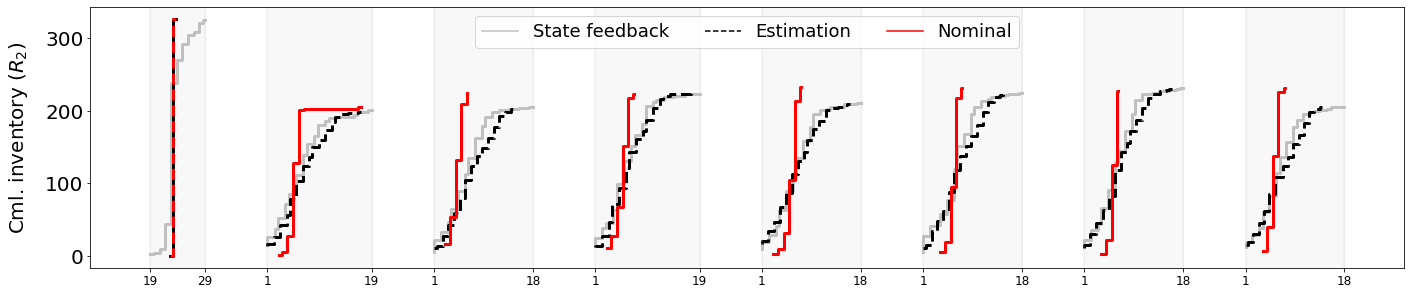

In [25]:
results = {'inventory': {}} 
cases_all = [] 
estimation = [] 
true = [] 
nominal = [] 
diff_nominal_estimate = [] 

t_estimate = [] 
t_nominal = [] 
t_true = [] 

qual_estimate_in = []
qual_nominal_in = []
qual_true_in = []

inv_estimate = [] 
inv_nominal = [] 
inv_true = [] 


for t in range(5,50): 
    
    x, y, z = [], [], []
    cases_all = [] 
    
    qual_estimate = {} 
    qual_nominal = {}
    qual_true = {}

    for q in range(1,31): 
        
         for instance_num in range(10):
        
#             real_time_estimates_Pinv = estimation_instances_nominal_Pinv[instance_num]
#             x_past_true = x_past_true_instance[instance_num]
#             x_past = x_past_instance[instance_num]
            
            x_past_true_est = estimation_fb_x_past_true_instance[instance_num]
            x_past_est = estimation_fb_x_past_instance[instance_num]
    
            x_past_true_nom = no_fb_inv_x_past_true_instance[instance_num]
            x_past_nom = no_fb_inv_x_past_instance[instance_num]
            
            for i in range(2,3): 

                cases_all.append([x_past_true_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_nom['inventory'][('R'+str(i), q, 1,t)]])

                if cases_all[-1][0] > 0: 
                    if q not in qual_true.keys(): 
                        qual_true[q] = cases_all[-1][0]
                    else: 
                        qual_true[q] += cases_all[-1][0]

                if cases_all[-1][1] > 0:
                    if q not in qual_estimate.keys(): 
                        qual_estimate[q] = cases_all[-1][1]
                    else: 
                        qual_estimate[q] += cases_all[-1][1]


                if cases_all[-1][2] > 0: 
                    if q not in qual_nominal.keys(): 
                        qual_nominal[q] = cases_all[-1][2]
                    else: 
                        qual_nominal[q] += cases_all[-1][2]
                    
 
    qual_estimate_in += [q for q in qual_estimate.keys()] 
    qual_nominal_in += [q for q in qual_nominal.keys()] 
    qual_true_in += [q for q in qual_true.keys()] 
    
    inv_estimate += [0.5*i for _,i in qual_estimate.items()] 
    inv_nominal += [0.5*i for _,i in qual_nominal.items()] 
    inv_true += [0.5*i for _,i in qual_true.items()] 
     
    t_estimate += [t-0.3 for _ in qual_estimate.keys()] 
    t_nominal += [t for _ in qual_nominal.keys()] 
    t_true += [t+0.3 for _ in qual_true.keys()]  

    
    
separation = 5
x_ticks_labels = [] 
x_ticks_values = [] 

fig = plt.figure(figsize = (20,4.5)) 
axes = plt.gca() 
for t in range(7,47,5): 
    q_vec_est = [] 
    q_vec_true = [] 
    q_vec_nominal = [] 

    for i,j in enumerate(t_estimate):
        if j == t-0.3: 
            q_vec_est += [qual_estimate_in[i] for _ in range(int(inv_estimate[i]))]
    for i,j in enumerate(t_true):
        if j == t+0.3 : 
            q_vec_true += [qual_true_in[i] for _ in range(int(inv_true[i]))]
    for i,j in enumerate(t_nominal):
        if j == t: 
            q_vec_nominal += [qual_nominal_in[i] for _ in range(int(inv_nominal[i]))]

    min_base = 100 
    max_base = 0 
    
    values, base = np.histogram(q_vec_true, bins=30)
    cumulative = np.cumsum(values)
    plt.step([i+separation for i in base[:-1]], cumulative, color = 'silver', linestyle = '-', alpha= 1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1]) 
    
    values, base = np.histogram(q_vec_est, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '-', alpha=1, linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '--', alpha=1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])

    values, base = np.histogram(q_vec_nominal, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '--', linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '-', linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])
    
    
    
    # plt.text(x = min_base+separation+1, y = 350,  s='t='+str(t))
    
    plt.axvline(x = min_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvline(x = max_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvspan(xmin = min_base+separation, xmax=max_base+separation, color = 'silver', alpha = 0.1) 
    
    x_ticks_labels += [int(np.round(min_base,0)), int(np.round(max_base,0)) ]
    x_ticks_values += [min_base+separation, max_base+separation] 
    
    separation += max_base + 10
    
    
plt.ylabel(r'Cml. inventory $(R_2)$', labelpad=15)
# plt.xlabel('Product quality', labelpad=15)
custom_lines = [Line2D([0], [0], color='silver'),
                Line2D([0], [0], color='k', linestyle = '--'),
                Line2D([0], [0], color='red', linestyle = '-'),]
plt.legend(custom_lines,['State feedback', 
             'Estimation', 'Nominal'], loc = 'upper center', ncol = 3, fontsize = 18) 


plt.xticks(x_ticks_values,x_ticks_labels, fontsize = 12) 
# plt.xlim((*axes.get_xlim()[0], 0.95*axes.get_xlim()[1]))  
plt.tight_layout() 
plt.savefig(path+'figures/quality_distribution_R2') 

    


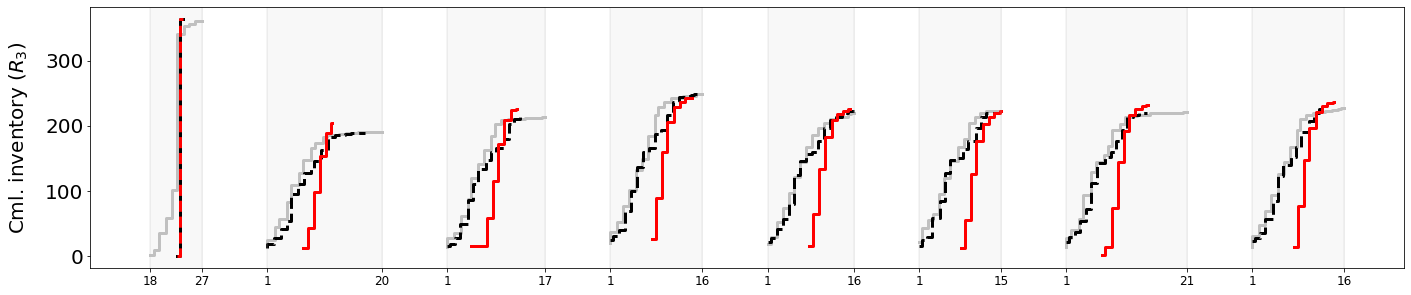

In [26]:
results = {'inventory': {}} 
cases_all = [] 
estimation = [] 
true = [] 
nominal = [] 
diff_nominal_estimate = [] 

t_estimate = [] 
t_nominal = [] 
t_true = [] 

qual_estimate_in = []
qual_nominal_in = []
qual_true_in = []

inv_estimate = [] 
inv_nominal = [] 
inv_true = [] 


for t in range(5,50): 
    
    x, y, z = [], [], []
    cases_all = [] 
    
    qual_estimate = {} 
    qual_nominal = {}
    qual_true = {}

    for q in range(1,31): 
        
         for instance_num in range(10):
        
#             real_time_estimates_Pinv = estimation_instances_nominal_Pinv[instance_num]
#             x_past_true = x_past_true_instance[instance_num]
#             x_past = x_past_instance[instance_num]
            
            x_past_true_est = estimation_fb_x_past_true_instance[instance_num]
            x_past_est = estimation_fb_x_past_instance[instance_num]
    
            x_past_true_nom = no_fb_inv_x_past_true_instance[instance_num]
            x_past_nom = no_fb_inv_x_past_instance[instance_num]
            
            for i in range(3,4): 

                cases_all.append([x_past_true_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_nom['inventory'][('R'+str(i), q, 1,t)]])

                if cases_all[-1][0] > 0: 
                    if q not in qual_true.keys(): 
                        qual_true[q] = cases_all[-1][0]
                    else: 
                        qual_true[q] += cases_all[-1][0]

                if cases_all[-1][1] > 0:
                    if q not in qual_estimate.keys(): 
                        qual_estimate[q] = cases_all[-1][1]
                    else: 
                        qual_estimate[q] += cases_all[-1][1]


                if cases_all[-1][2] > 0: 
                    if q not in qual_nominal.keys(): 
                        qual_nominal[q] = cases_all[-1][2]
                    else: 
                        qual_nominal[q] += cases_all[-1][2]
                    
 
    qual_estimate_in += [q for q in qual_estimate.keys()] 
    qual_nominal_in += [q for q in qual_nominal.keys()] 
    qual_true_in += [q for q in qual_true.keys()] 
    
    inv_estimate += [0.5*i for _,i in qual_estimate.items()] 
    inv_nominal += [0.5*i for _,i in qual_nominal.items()] 
    inv_true += [0.5*i for _,i in qual_true.items()] 
     
    t_estimate += [t-0.3 for _ in qual_estimate.keys()] 
    t_nominal += [t for _ in qual_nominal.keys()] 
    t_true += [t+0.3 for _ in qual_true.keys()]  

    
    
separation = 5
x_ticks_labels = [] 
x_ticks_values = [] 

fig = plt.figure(figsize = (20,4.5)) 
axes = plt.gca() 
for t in range(7,47,5): 
    q_vec_est = [] 
    q_vec_true = [] 
    q_vec_nominal = [] 

    for i,j in enumerate(t_estimate):
        if j == t-0.3: 
            q_vec_est += [qual_estimate_in[i] for _ in range(int(inv_estimate[i]))]
    for i,j in enumerate(t_true):
        if j == t+0.3 : 
            q_vec_true += [qual_true_in[i] for _ in range(int(inv_true[i]))]
    for i,j in enumerate(t_nominal):
        if j == t: 
            q_vec_nominal += [qual_nominal_in[i] for _ in range(int(inv_nominal[i]))]

    min_base = 100 
    max_base = 0 
    
    values, base = np.histogram(q_vec_true, bins=30)
    cumulative = np.cumsum(values)
    plt.step([i+separation for i in base[:-1]], cumulative, color = 'silver', linestyle = '-', alpha= 1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1]) 
    
    values, base = np.histogram(q_vec_est, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '-', alpha=1, linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '--', alpha=1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])

    values, base = np.histogram(q_vec_nominal, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '--', linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '-', linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])
    
    
    
    # plt.text(x = min_base+separation+1, y = 400,  s='t='+str(t))
    
    plt.axvline(x = min_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvline(x = max_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvspan(xmin = min_base+separation, xmax=max_base+separation, color = 'silver', alpha = 0.1) 
    
    x_ticks_labels += [int(np.round(min_base,0)), int(np.round(max_base,0)) ]
    x_ticks_values += [min_base+separation, max_base+separation] 
    
    separation += max_base + 10
    
    
plt.ylabel(r'Cml. inventory $(R_3)$', labelpad=15)
# plt.xlabel('Product quality', labelpad=15)
# plt.legend(['State feedback', 
#              'Estimation', 'Nominal'], loc = 'upper center', ncol = 3, fontsize = 12) 
plt.xticks(x_ticks_values,x_ticks_labels, fontsize = 12) 
# plt.xlim((*axes.get_xlim()[0], 0.95*axes.get_xlim()[1]))  
plt.tight_layout() 
plt.savefig(path+'figures/quality_distribution_R3') 

    


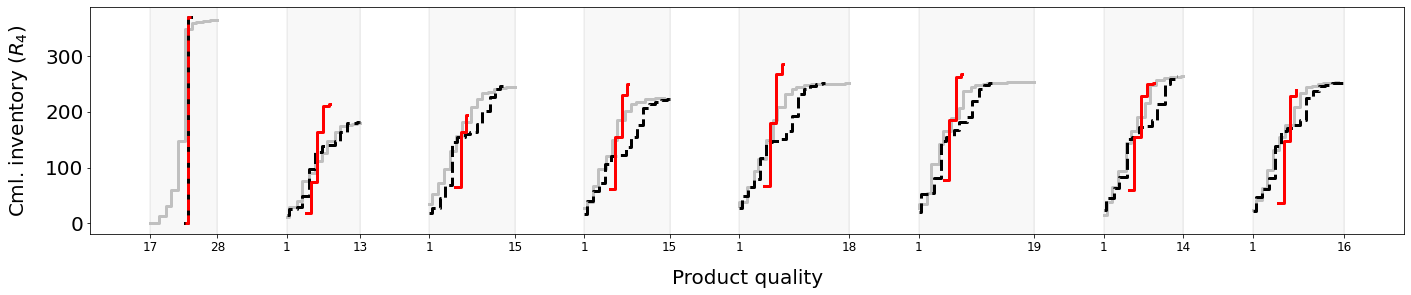

In [27]:
results = {'inventory': {}} 
cases_all = [] 
estimation = [] 
true = [] 
nominal = [] 
diff_nominal_estimate = [] 

t_estimate = [] 
t_nominal = [] 
t_true = [] 

qual_estimate_in = []
qual_nominal_in = []
qual_true_in = []

inv_estimate = [] 
inv_nominal = [] 
inv_true = [] 


for t in range(5,50): 
    
    x, y, z = [], [], []
    cases_all = [] 
    
    qual_estimate = {} 
    qual_nominal = {}
    qual_true = {}

    for q in range(1,31): 
        
         for instance_num in range(10):
        
#             real_time_estimates_Pinv = estimation_instances_nominal_Pinv[instance_num]
#             x_past_true = x_past_true_instance[instance_num]
#             x_past = x_past_instance[instance_num]
            
            x_past_true_est = estimation_fb_x_past_true_instance[instance_num]
            x_past_est = estimation_fb_x_past_instance[instance_num]
    
            x_past_true_nom = no_fb_inv_x_past_true_instance[instance_num]
            x_past_nom = no_fb_inv_x_past_instance[instance_num]
            
            for i in range(4,5): 

                cases_all.append([x_past_true_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_est['inventory'][('R'+str(i), q, 1,t)],
                                  x_past_nom['inventory'][('R'+str(i), q, 1,t)]])

                if cases_all[-1][0] > 0: 
                    if q not in qual_true.keys(): 
                        qual_true[q] = cases_all[-1][0]
                    else: 
                        qual_true[q] += cases_all[-1][0]

                if cases_all[-1][1] > 0:
                    if q not in qual_estimate.keys(): 
                        qual_estimate[q] = cases_all[-1][1]
                    else: 
                        qual_estimate[q] += cases_all[-1][1]


                if cases_all[-1][2] > 0: 
                    if q not in qual_nominal.keys(): 
                        qual_nominal[q] = cases_all[-1][2]
                    else: 
                        qual_nominal[q] += cases_all[-1][2]
                    
 
    qual_estimate_in += [q for q in qual_estimate.keys()] 
    qual_nominal_in += [q for q in qual_nominal.keys()] 
    qual_true_in += [q for q in qual_true.keys()] 
    
    inv_estimate += [0.5*i for _,i in qual_estimate.items()] 
    inv_nominal += [0.5*i for _,i in qual_nominal.items()] 
    inv_true += [0.5*i for _,i in qual_true.items()] 
     
    t_estimate += [t-0.3 for _ in qual_estimate.keys()] 
    t_nominal += [t for _ in qual_nominal.keys()] 
    t_true += [t+0.3 for _ in qual_true.keys()]  

    
    
separation = 5
x_ticks_labels = [] 
x_ticks_values = [] 

fig = plt.figure(figsize = (20,4.5)) 
axes = plt.gca() 
for t in range(7,47,5): 
    q_vec_est = [] 
    q_vec_true = [] 
    q_vec_nominal = [] 

    for i,j in enumerate(t_estimate):
        if j == t-0.3: 
            q_vec_est += [qual_estimate_in[i] for _ in range(int(inv_estimate[i]))]
    for i,j in enumerate(t_true):
        if j == t+0.3 : 
            q_vec_true += [qual_true_in[i] for _ in range(int(inv_true[i]))]
    for i,j in enumerate(t_nominal):
        if j == t: 
            q_vec_nominal += [qual_nominal_in[i] for _ in range(int(inv_nominal[i]))]

    min_base = 100 
    max_base = 0 
    
    values, base = np.histogram(q_vec_true, bins=30)
    cumulative = np.cumsum(values)
    plt.step([i+separation for i in base[:-1]], cumulative, color = 'silver', linestyle = '-', alpha= 1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1]) 
    
    values, base = np.histogram(q_vec_est, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '-', alpha=1, linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'k', linestyle = '--', alpha=1, linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])

    values, base = np.histogram(q_vec_nominal, bins=30)
    cumulative = np.cumsum(values)
    if t == 7: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '--', linewidth = 3)
    else: 
        plt.step([i+separation for i in base[:-1]], cumulative, color = 'r', linestyle = '-', linewidth = 3)
    min_base = min(min_base, base[:-1][0]) 
    max_base = max(max_base, base[:-1][-1])
    
    
    
    # plt.text(x = min_base+separation+1, y = 400,  s='t='+str(t))
    
    plt.axvline(x = min_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvline(x = max_base+separation , color = 'silver', alpha = 0.2) 
    plt.axvspan(xmin = min_base+separation, xmax=max_base+separation, color = 'silver', alpha = 0.1) 
    
    x_ticks_labels += [int(np.round(min_base,0)), int(np.round(max_base,0)) ]
    x_ticks_values += [min_base+separation, max_base+separation] 
    
    separation += max_base + 10
    
    
plt.ylabel(r'Cml. inventory $(R_4)$', labelpad=15)
plt.xlabel('Product quality', labelpad=15)
# plt.legend(['State feedback', 
#              'Estimation', 'Nominal'], loc = 'upper center', ncol = 3, fontsize = 12) 
plt.xticks(x_ticks_values,x_ticks_labels, fontsize = 12) 
# plt.xlim((*axes.get_xlim()[0], 0.95*axes.get_xlim()[1]))  
plt.tight_layout() 
plt.savefig(path+'figures/quality_distribution_R4') 

    
